In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import DUST.plot.maps as dmap
import DUST.plot.plotting as dplot
from thesis_toolbox.utils import get_locations_CLP, source_contrib_composite_difference
from thesis_toolbox.composites.create_composites import detrend_timeseries,select_years_to_composite
from thesis_toolbox.plot.plot_source_contribution import composite_depositon_facet_plot
import glob
import matplotlib as mpl
import numpy as np
import matplotlib
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
if 'snakemake' in globals():
    to_file = True
    path='./'
else:
    path = '../../'
    to_file= False

In [3]:
# locs = get_locations_CLP()
locs = ['SHAPOTOU','BADOE','YINCHUAN','LUOCHUAN','SACOL','LANTIAN','LINGTAI']
locs_bar = ['SHAPOTOU','YINCHUAN','SACOL','LINGTAI','BADOE','LUOCHUAN','LANTIAN']
ds =source_contrib_composite_difference(path, locs, 'total_deposition','2micron', norm=True)
ds_wetdep = source_contrib_composite_difference(path, locs_bar, 'wetdep','2micron',norm=False)
ds_drydep = source_contrib_composite_difference(path, locs_bar, 'drydep','2micron', norm=False)

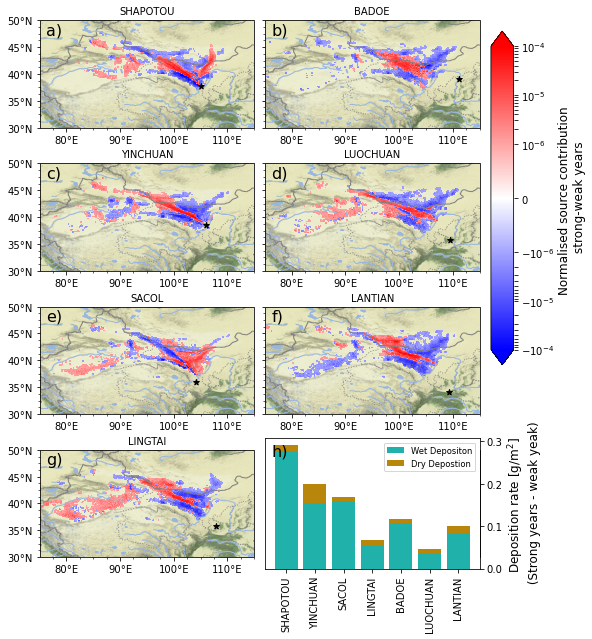

In [9]:
composite_depositon_facet_plot(ds,ds_wetdep,ds_drydep,lin_tresh=1e-6,vmin=-1e-4,vmax=1e-4,upper_bound=1e-6, 
                               lower_bound=-1e-6, add_labels=False, colorbar=False,
                               figsize=(8.3*0.95, 11.7*0.88), hspace=0.1, wspace=0.05, fontsize_title=10)
fig = plt.gcf()
cax = fig.add_axes([0.92, 0.4, 0.04,0.45])
norm=matplotlib.colors.SymLogNorm(linthresh=1e-6, linscale=1,vmin=-1e-4, vmax=1e-4,base=10)
fig.colorbar(cm.ScalarMappable(norm=norm,cmap='bwr'),cax=cax, label='Normalised source contribution \n strong-weak years'
                            ,extend='both')
if to_file:
    plt.savefig(snakemake.output.micron2, bbox_inches='tight')

In [11]:
ds20m =source_contrib_composite_difference(path, locs, 'total_deposition','20micron',norm=True)
ds20m_wet = source_contrib_composite_difference(path, locs_bar, 'wetdep','20micron',norm=False)
ds20m_drydep = source_contrib_composite_difference(path, locs_bar, 'drydep','20micron',norm=False)

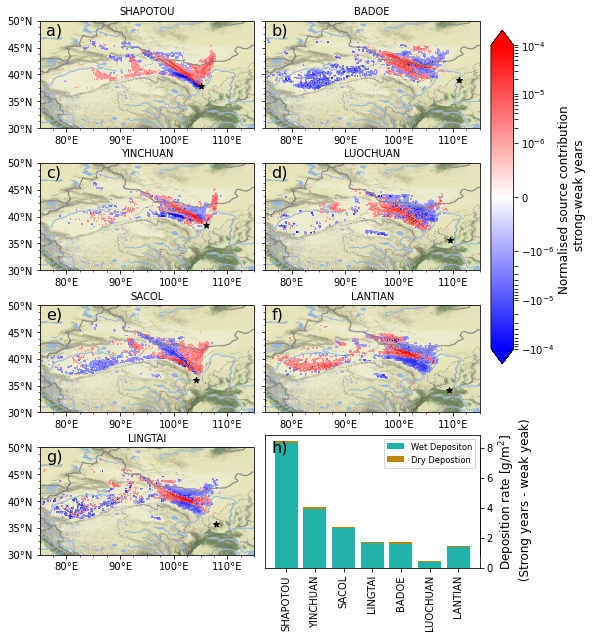

In [12]:
composite_depositon_facet_plot(ds20m,ds20m_wet,ds20m_drydep,lin_tresh=1e-6,vmin=-1e-4,vmax=1e-4,upper_bound=1e-6, 
                               lower_bound=-1e-6,  figsize=(8.3*0.95, 11.7*0.88), 
                               hspace=0.07, colorbar=False, 
                               wspace=0.05, fontsize_title=10, add_labels=False )

fig = plt.gcf()
cax = fig.add_axes([0.92, 0.4, 0.04,0.45])
norm=matplotlib.colors.SymLogNorm(linthresh=1e-6, linscale=1,vmin=-1e-4, vmax=1e-4,base=10)
fig.colorbar(cm.ScalarMappable(norm=norm,cmap='bwr'),cax=cax, label='Normalised source contribution \n strong-weak years'
                            ,extend='both')
if to_file:
    plt.savefig(snakemake.output.micron20, bbox_inches='tight')